In [1]:
def load_namespace():
    import sys
    sys.path.insert(1,f'/wsu/home/gy/gy40/gy4065/hm_jetscapeml_source')#WSU Grid
    sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v1
    sys.path.insert(1,'/cont`ent/drive/MyDrive/Projects/110_JetscapeMl/hm_jetscapeml_source')#Colab GDrive v2
    sys.path.insert(1,f'/mnt/g/My Drive/Projects/110_JetscapeMl/hm_jetscapeml_source')#wsl gdrive
    sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm_jetscapeml_source') #Windows GDrive
    sys.path.insert(1,'/home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/') #office tower
    
load_namespace()

In [2]:
# Loading/Preparing Environment for simulation
from jet_ml.config import Config
folds=2
epochs=1
dataset_size=1000 #10800000 #1000000
classification_parameter="synthesis"
model_name="res_net"
server_name="hmsrv3_cpu_24_mem_32gb"
simulation_name=f"{classification_parameter}_{model_name}_{folds}_fold_{epochs}_epoch_{int(dataset_size/1000)}k_dataset_size_{server_name}"

config=Config(simulation_name=simulation_name)
config.__str__()

2024-10-24 12:44:40.803646: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-24 12:44:40.812417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-24 12:44:40.821641: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-24 12:44:40.824491: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-24 12:44:40.831839: I tensorflow/core/platform/cpu_feature_guar

Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb created.
Directory /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb created.


2024-10-24 12:44:41.863970: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


'Project Root: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source\nData Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/data\nModels Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models\nReports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports\nFigures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures\nSimulation Models Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb\nSimulation Reports Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb\nSimulation Figures Directory: /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/reports/figures/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb\nEnvironment Details:\n  TensorFlow Version: 2.17.0\n  Keras V

In [3]:
from IPython.display import display

In [4]:
import jet_ml.classifiers.synthesis.preprocess_dataset as pred
(x,y_raw,y_df)=pred.preprocess_dataset_for_synthesis(dataset_size)
print(f"x.shape:{x.shape}")
print(f"y_df.shape: {y_df.shape}")
print(f"y_raw.shape: {y_raw.shape}")
display(y_df[:3])
display(y_raw[:3])
y_classes=y_df.columns
y=y_df.values


Dataset Preprocessor
Loading the whole dataset
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
x.shape:(1000, 32, 32, 1)
y_df.shape: (1000, 12)
y_raw.shape: (1000,)


,MLBT_0.2_1.5,MLBT_0.2_2.0,MLBT_0.2_2.5,MLBT_0.3_1.5,MLBT_0.3_2.0,MLBT_0.3_2.5,MLBT_0.4_1.5,MLBT_0.4_2.0,MLBT_0.4_2.5,MMAT_0.2_1,MMAT_0.3_1,MMAT_0.4_1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array(['MLBT_0.2_1.5', 'MLBT_0.2_1.5', 'MLBT_0.2_1.5'], dtype='<U12')

In [5]:
#This method can be moved to resnet model, regfading it has the same fucntionality in either of the classifiers
from jet_ml.classifiers.alpha_s.preprocess_dataset import preprocess_dataset_for_resnet

WIDTH = 256
HEIGHT = 256
import tensorflow as tf
with tf.device("/CPU:0"):
    x_resized,y_resized= preprocess_dataset_for_resnet(x,y,WIDTH,HEIGHT)

'x.shape (1000, 32, 32, 1)'

'y.shape (1000, 12)'

'Data is normalized: True'

'x_rgb.shape (1000, 32, 32, 3)'

'x_resized.shape (1000, 256, 256, 3)'

'y_resized.shape (1000, 12, 1)'

Fold #1
Shape of x in the batch: (32, 256, 256, 3)


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1131 - loss: 5.7922
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb/ResNet50_fold_1_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.1139 - loss: 5.7492 - val_accuracy: 0.0000e+00 - val_loss: 2.5028 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:01:14
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
batch_index: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
batch_index: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 

'y_test.shape: (500, 12, 1)'

'y_test_2d.shape: (500, 12)'

'pred.len: 500'

###########################################################
training_history_fold_1.csv


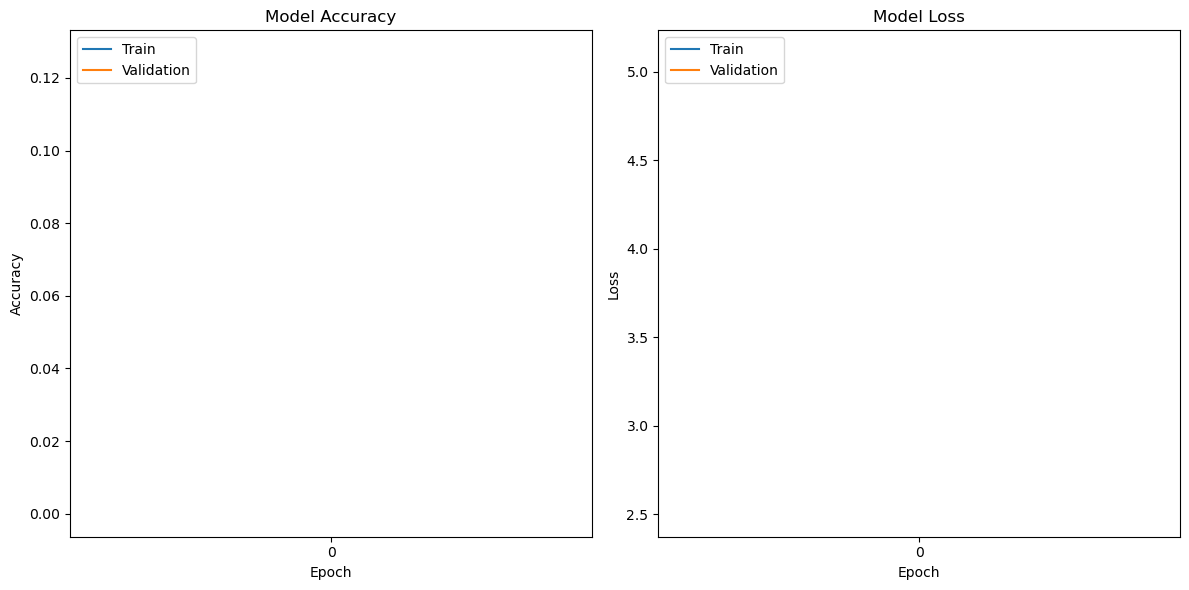

stored all splits' history in training_stats.csv
Fold #2
Shape of x in the batch: (32, 256, 256, 3)


/home/arsalan/miniconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.0564 - loss: 4.3139
Epoch 1: val_accuracy improved from -inf to 0.08333, saving model to /home/arsalan/Projects/110_JetscapeML/hm_jetscapeml_source/models/synthesis_res_net_2_fold_1_epoch_1k_dataset_size_hmsrv3_cpu_24_mem_32gb/ResNet50_fold_2_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 4s/step - accuracy: 0.0622 - loss: 4.3220 - val_accuracy: 0.0833 - val_loss: 2.5136 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 1.
Elpased time: 0:01:16
batch_index: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
batch_index: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step
batch_index: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step
batch_index: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
batch_index: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
batch_index: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
batch_index: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
batch_index: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step
batch_index: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 7

'y_test.shape: (500, 12, 1)'

'y_test_2d.shape: (500, 12)'

'pred.len: 500'

###########################################################
training_history_fold_2.csv


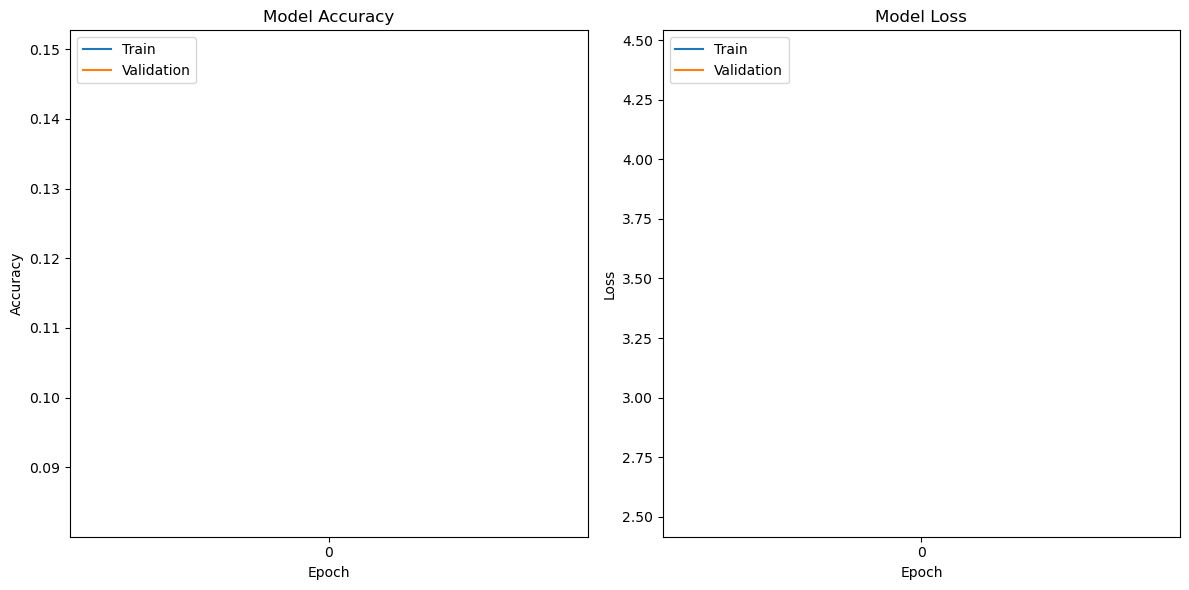

stored all splits' history in training_stats.csv


In [6]:
if folds !=1:
    from jet_ml.dataset import create_train_data_generator, create_validation_data_generator
    from jet_ml.models.resnet import build_model
    from jet_ml.models.helpers import compile_model
    from jet_ml.models.resnet import train_model
    from jet_ml.evaluation import get_accuracy
    from jet_ml.evaluation import store_out_of_sample_y_and_predictions

    # fold, shuffle, x, y_raw
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from sklearn import metrics
    k_fold=StratifiedKFold(folds,shuffle=True,random_state=42)

    out_of_sample_y=[]
    out_of_sample_pred=[]
    folds_accuracy=[]
    epochs_needed = []
    times_taken=[]
    fold=0

    #Must specify y StratifiedKFold for classification
    for train,test in k_fold.split(x,y_raw):
        fold+=1
        print(f"Fold #{fold}")

        x_train=x_resized[train]
        y_train=y_resized[train]
        train_generator = create_train_data_generator(x_train, y_train)
        # Get a batch of data
        x_batch, y_batch = next(train_generator)

        # Get the shape of y (labels) from the batch
        x_batch_shape = x_batch.shape

        print("Shape of x in the batch:", x_batch_shape)
        
        #log train_generator size
        # print(f"train_generator size: {len(train_generator)}")
        x_test=x_resized[test]
        y_test=y_resized[test]
        val_generator = create_validation_data_generator(x_test, y_test)

        # from jet_ml.models import resnet
        from tensorflow.keras.layers import Input
        
        input_tensor = Input(shape=(HEIGHT, WIDTH, 3))
        output_shape=y.shape[1]
        activation='softmax'
        import tensorflow as tf
        with tf.device('GPU:0'):#/GPU:0
            model=build_model(input_tensor,num_classes=output_shape,activation=activation)
            # model.summary()
            model=compile_model(model)
            monitor='val_accuracy' #'val_accuracy' or 'val_loss'
            
            model, history,elapsed_time,stopped_epoch=train_model(model,
                                                                train_generator,val_generator,
                                                                epochs=epochs,monitor=monitor,
                                                                fold=fold)

        from jet_ml.evaluation import get_accuracy_from_generator
        pred, score=get_accuracy_from_generator(model=model, data_generator=val_generator)
        
        # print(f"Accuracy: {score}")
        print(f"Fold score (accuracy): {score}")
        folds_accuracy.append(score)

        times_taken.append(elapsed_time)    
        epochs_needed.append(epochs)

        
        print("###########################################################")
        # display("y_test[:2]: ",y_test[:2])
        display(f"y_test.shape: {y_test.shape}")  

        # Assuming y_test is a numpy array with shape (500, 3, 1)
        y_test_2d = np.squeeze(y_test, axis=-1)  # Removes the last axis, turning it into (500, 3)
        display(f"y_test_2d.shape: {y_test_2d.shape}") 
        
        # display("pred[:2]: ",pred[:2])
        display(f"pred.len: {len(pred)}")
        
        store_out_of_sample_y_and_predictions(y_df,y_test_2d,pred,y_classes,fold=fold)

        # out_of_sample_y.append(y_test)
        # out_of_sample_pred.append(pred)

        # store_out_of_sample_y_and_predictions(y_df,y_test_squeezed,pred,y_classes,fold=fold)

        # from jet_ml.evaluation import store_out_of_sample_y_and_predictions
        # convert out_of_sample_y from (1000, 3, 1) to (1000, 3)
        # out_of_sample_y_squeezed=np.squeeze(out_of_sample_y,axis=2)
        
        
        print("###########################################################")
        from jet_ml.evaluation import save_training_history
        save_training_history(history=history,fold=fold)

        from jet_ml.evaluation import plot_training_history
        plot_training_history(history=history,fold=fold)

        from jet_ml.evaluation import save_training_stats
        save_training_stats(accuracies=folds_accuracy,
                            epochs_needed=epochs_needed,
                            times_taken=times_taken)



In [7]:
#implementing a method that load and concatenate the out_of_sample_y and out_of_sample_pred dataframes from csv files
from jet_ml.evaluation import load_out_of_sample_y_and_predictions
out_of_sample_y,out_of_sample_pred=load_out_of_sample_y_and_predictions(folds,num_classes=len(y_classes))


loading out_of_sample_y and Prediction for fold_1
y_len 1
pred_len 1
loading out_of_sample_y and Prediction for fold_2
y_len 2
pred_len 2


In [8]:
import numpy as np
# Build the oos prediction list and calculate the error.
out_of_sample_y=np.concatenate(out_of_sample_y)
display("out_of_sample_y.shape: ", out_of_sample_y.shape)
display("out_of_sample_y: ",out_of_sample_y[:5])

out_of_sample_pred=np.concatenate(out_of_sample_pred)

# convert the out_of_sample_y to a 1D array
out_of_sample_y_compare=np.argmax(out_of_sample_y,axis=1)# For accuracy and confusion matrix calculation
display("out_of_sample_compare.shape: ",out_of_sample_y_compare.shape)
display("out_of_sample_compare" ,out_of_sample_y_compare[:5])


'out_of_sample_y.shape: '

(1000, 12)

'out_of_sample_y: '

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

'out_of_sample_compare.shape: '

(1000,)

'out_of_sample_compare'

array([0, 0, 0, 0, 0])

In [9]:
from jet_ml.evaluation import calculate_accuracy
calculate_accuracy(out_of_sample_y_compare,out_of_sample_pred)

'accuracy: 0.083'

Confusion matrix, without normalization
[[ 0 42  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 42]
 [ 0 41  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 41]
 [ 0 41  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 41]
 [ 0 41  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 41]
 [ 0 41  0  0  0  0  0  0  0  0  0 42]
 [ 0 42  0  0  0  0  0  0  0  0  0 41]]
Normalized confusion matrix
[[0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.   0.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5 ]
 [0.   0.49 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.51]
 [0.   0.51 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.49]
 [0.   0.49 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.51]
 [0.   0.51 0.   0.   

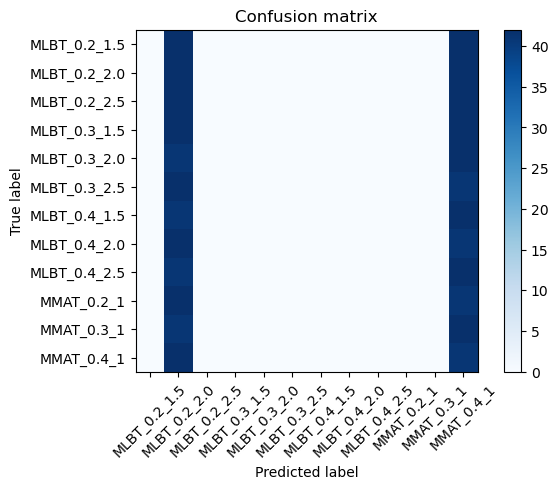

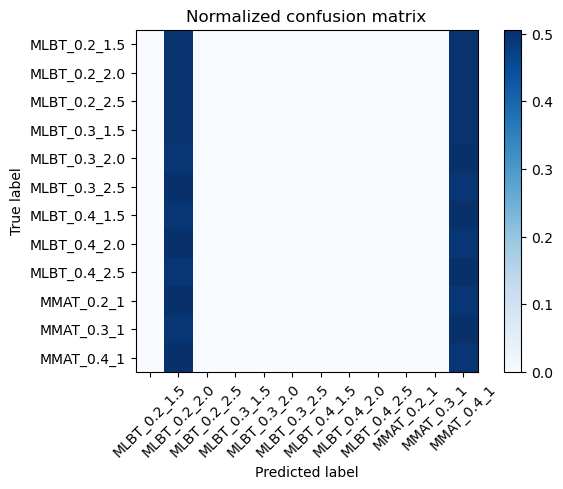

In [10]:
from jet_ml.evaluation import calculate_confusion_matrix
calculate_confusion_matrix(out_of_sample_y_compare, out_of_sample_pred,y_classes)